<a href="https://colab.research.google.com/github/elfkr7/Python-Data-Process-Algorithms/blob/main/AppleCart_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PART1**
*Summary of Electorate*

In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
!pip install -U pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=f9dd46e785721a9c792478d5bd5cd6214fb7b202170f4996ed2cadada01e92c7
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


**GET TO KNOW THE DATA**

In [24]:

#upload data dictionary
voter_file_dict=pd.read_excel('Data Dictionary.xlsx',sheet_name='Voter File')
modeled_data_dict=pd.read_excel('Data Dictionary.xlsx',sheet_name='Modeled Data')

In [25]:
voter_file_dict

,Field,Description,Values
0,age,age of an individual,integer - years
1,avghomevalue,Average home value of census block,integer - home value in dollars
2,avgincome,Average income of census block,integer - avg income in dollars
3,edu_cg,"percentage of voters with ""college graduate"" a...",Integer between 0 and 100 as percentage
4,edu_gd,"percentage of voters with ""graduate degree"" as...",Integer between 0 and 100 as percentage
5,edu_hsg,"percentage of voters with ""high school degree""...",Integer between 0 and 100 as percentage
6,edu_nhsg,"percentage of voters with ""no high school degr...",Integer between 0 and 100 as percentage
7,edu_sc,"percentage of voters with ""some college"" as hi...",Integer between 0 and 100 as percentage
8,statewide_primary_2012,statewide_primary_2012,"a (voted absentee), p (voted at poll), n (did ..."
9,statewide_general_2012,statewide_general_2012,"a (voted absentee), p (voted at poll), n (did ..."


In [26]:
modeled_data_dict

,Revised Field,Description
0,uid,unique identifier
1,public_schools__good,"likelihood to believe the local schools are ""d..."
2,public_schools__fair,"likelihood to believe the local schools are ""d..."
3,public_schools__poor,"likelihood to believe the local schools are ""d..."
4,vote__candidateA,likelihood to vote for candidate A
5,vote__other,likelihood to vote for another candidate
6,vote__candidateB,likelihood to vote for candidate B
7,ideology__conservative,"likelihood to consider themselves as ""conserva..."
8,ideology__liberal,"likelihood to consider themselves as ""liberal"""
9,ideology__moderate,"likelihood to consider themselves as ""moderate"""


In [27]:
#upload data tables
known_opponents=pd.read_csv('known_opponents.csv')
known_supporters=pd.read_csv('known_supporters.csv')
model_probabilities=pd.read_csv('model_probabilities.csv')
uid_to_households_key=pd.read_csv('uid_to_households_key.csv')
voter_file=pd.read_csv('voter_file.csv')


In [90]:
known_opponents

,uid,school_decision,school_decision
0,1931894010,KO,KO
1,19191518851,KO,KO
2,19524553364,KO,KO
3,1953078109,KO,KO
4,19374681962,KO,KO
...,...,...,...
10551,19378458993,KO,KO
10552,19525319660,KO,KO
10553,19506955442,KO,KO
10554,19277500485,KO,KO


In [29]:
model_probabilities.head()

,uid,public_schools__good,public_schools__fair,public_schools__poor,vote__candidateA,vote__other,vote__candidateB,ideology__conservative,ideology__liberal,ideology__moderate,ideology__progressive,issueA__no_concerns,issueA__serious_concerns,issueA__some_concerns,issueB__no_concerns,issueB__serious_concerns,issueB__some_concerns,turnout,persuadability__score,job_performance__candidateB
0,19525609133,0.343966,0.493970,0.162064,0.333745,0.123949,0.542306,0.027619,0.414541,0.256051,0.301789,0.219005,0.440610,0.340384,0.273971,0.416796,0.309233,0.020173,0.528109,0.436197
1,19525609510,0.307031,0.513478,0.179490,0.316816,0.145633,0.537552,0.033074,0.318714,0.232350,0.415862,0.259881,0.464712,0.275407,0.228263,0.479867,0.291871,0.311139,0.431273,0.520598
2,19525610606,0.298899,0.439803,0.261299,0.265804,0.142575,0.591621,0.031614,0.334249,0.287191,0.346946,0.224291,0.453332,0.322377,0.251196,0.417715,0.331088,0.103827,0.500297,0.391276
3,19525612234,0.322666,0.525570,0.151764,0.294365,0.175416,0.530220,0.029242,0.411088,0.222685,0.336985,0.206492,0.487178,0.306329,0.198119,0.482401,0.319480,0.062270,0.468688,0.481169
4,19525620658,0.298585,0.520434,0.180981,0.283475,0.161001,0.555524,0.028763,0.444118,0.184623,0.342496,0.231427,0.482403,0.286170,0.245547,0.450242,0.304211,0.019510,0.518496,0.450097


In [30]:
uid_to_households_key.head()

,uid,household_key
0,19424499998,19-191823472
1,19527783609,19-191823531
2,19527354965,19-191823405
3,19527673448,19-191823552
4,19526079447,19-191823434


In [31]:
voter_file.head()

,uid,age,avghomevalue,avgincome,edu_cg,edu_gd,edu_hsg,edu_nhsg,edu_sc,voted_statewide_primary_2012,...,voted_statewide_general_2014,voted_municipal_primary_2015,voted_municipal_general_2015,voted_statewide_primary_2016,home,ismarried,neighborhood,party,sex,whitecollarp
0,19525548382,67.0,545634,109128,28,9,12,16,31,N,...,N,N,N,N,NaN,N,31,DS,M,69
1,19525548353,29.0,545634,109128,28,9,12,16,31,N,...,N,N,N,N,NaN,N,31,DS,F,69
2,19169104068,70.0,545634,109128,28,9,12,16,31,P,...,P,P,N,P,NaN,N,31,D,M,69
3,19320809742,73.0,545634,109128,28,9,12,16,31,N,...,P,P,N,P,H,N,31,D,F,69
4,19522820742,77.0,545634,109128,28,9,12,16,31,N,...,N,N,N,N,H,N,31,R,F,69


In [32]:
#check correlations
model_probabilities.corr()

,uid,public_schools__good,public_schools__fair,public_schools__poor,vote__candidateA,vote__other,vote__candidateB,ideology__conservative,ideology__liberal,ideology__moderate,ideology__progressive,issueA__no_concerns,issueA__serious_concerns,issueA__some_concerns,issueB__no_concerns,issueB__serious_concerns,issueB__some_concerns,turnout,persuadability__score,job_performance__candidateB
uid,1.000000,0.019762,0.040648,-0.037058,0.005637,-0.008798,0.000534,-0.054267,0.028838,-0.043998,0.077338,-0.112768,0.016523,0.065947,-0.098961,-0.009915,0.090824,-0.140516,0.049947,-0.075853
public_schools__good,0.019762,1.000000,0.446574,-0.803273,0.040041,-0.434693,0.229294,-0.559012,0.475264,-0.046884,0.357094,0.127887,-0.275857,0.183225,0.152267,-0.456463,0.434907,-0.002273,-0.425016,0.505662
public_schools__fair,0.040648,0.446574,1.000000,-0.891642,-0.063402,-0.514081,0.365391,-0.680129,0.519244,-0.154630,0.554107,-0.008553,-0.374876,0.382441,0.224853,-0.475394,0.400210,-0.121375,-0.519279,0.439782
public_schools__poor,-0.037058,-0.803273,-0.891642,1.000000,0.021944,0.562165,-0.359255,0.735605,-0.586131,0.126657,-0.549545,-0.059017,0.389130,-0.347294,-0.226726,0.547428,-0.486473,0.081947,0.560729,-0.548616
vote__candidateA,0.005637,0.040041,-0.063402,0.021944,1.000000,-0.088055,-0.797368,0.025751,-0.060649,0.083284,-0.039591,-0.188032,0.243322,-0.106561,-0.213833,0.122134,0.021365,-0.137703,0.290251,-0.232337
vote__other,-0.008798,-0.434693,-0.514081,0.562165,-0.088055,1.000000,-0.530937,0.552746,-0.354195,-0.000387,-0.420955,-0.098055,0.362840,-0.292344,-0.289281,0.455339,-0.324513,0.092895,0.632749,-0.500787
vote__candidateB,0.000534,0.229294,0.365391,-0.359255,-0.797368,-0.530937,1.000000,-0.356786,0.266183,-0.070617,0.288715,0.219368,-0.426823,0.267768,0.357171,-0.379767,0.178430,0.060865,-0.630270,0.501053
ideology__conservative,-0.054267,-0.559012,-0.680129,0.735605,0.025751,0.552746,-0.356786,1.000000,-0.651516,-0.132601,-0.659844,0.006150,0.356744,-0.362487,-0.140519,0.568848,-0.581163,0.204992,0.550273,-0.414119
ideology__liberal,0.028838,0.475264,0.519244,-0.586131,-0.060649,-0.354195,0.266183,-0.651516,1.000000,-0.202967,0.132319,0.054615,-0.245722,0.206608,0.098443,-0.370248,0.372706,-0.005685,-0.423973,0.406700
ideology__moderate,-0.043998,-0.046884,-0.154630,0.126657,0.083284,-0.000387,-0.070617,-0.132601,-0.202967,1.000000,-0.349201,0.106779,-0.082853,0.004997,0.125516,-0.051438,-0.037212,0.006585,0.000891,0.019404


In [33]:
#supporters_evaluation

q="""
    select *
    from model_probabilities
    where uid in (select uid from known_supporters);
    """
supporters_probabilities=pysqldf(q)
supporters_probabilities

,uid,public_schools__good,public_schools__fair,public_schools__poor,vote__candidateA,vote__other,vote__candidateB,ideology__conservative,ideology__liberal,ideology__moderate,ideology__progressive,issueA__no_concerns,issueA__serious_concerns,issueA__some_concerns,issueB__no_concerns,issueB__serious_concerns,issueB__some_concerns,turnout,persuadability__score,job_performance__candidateB
0,19525641157,0.247795,0.440478,0.311728,0.325040,0.178003,0.496957,0.149153,0.242683,0.381392,0.226772,0.239468,0.508954,0.251577,0.233525,0.490626,0.275849,0.539205,0.641632,0.436225
1,19525643177,0.328324,0.494784,0.176892,0.323875,0.106070,0.570054,0.127718,0.289949,0.353158,0.229175,0.213536,0.537644,0.248821,0.227486,0.504873,0.267640,0.038418,0.489358,0.413360
2,19525661305,0.320774,0.376417,0.302809,0.325325,0.101126,0.573549,0.030034,0.292034,0.196882,0.481050,0.216249,0.434093,0.349658,0.253634,0.418779,0.327587,0.032892,0.442396,0.442025
3,19525696532,0.211196,0.376713,0.412091,0.276981,0.175858,0.547161,0.437409,0.167766,0.239445,0.155380,0.229475,0.521667,0.248858,0.236415,0.492714,0.270871,0.149503,0.682017,0.412613
4,19525697477,0.283143,0.468623,0.248234,0.243855,0.102782,0.653363,0.188088,0.205489,0.239462,0.366961,0.205837,0.485985,0.308178,0.234105,0.460177,0.305718,0.009218,0.569712,0.423261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77816,19524321814,0.182372,0.321434,0.496194,0.275369,0.232083,0.492548,0.599715,0.119387,0.153349,0.127549,0.239426,0.538245,0.222329,0.236901,0.536850,0.226249,0.322149,0.735640,0.317409
77817,19524343245,0.285757,0.446214,0.268030,0.312553,0.166942,0.520505,0.061735,0.335716,0.294467,0.308082,0.234210,0.456145,0.309645,0.252413,0.459519,0.288068,0.189828,0.535599,0.447649
77818,19524367951,0.224486,0.438809,0.336705,0.240208,0.158770,0.601022,0.193778,0.287081,0.238819,0.280322,0.245607,0.528366,0.226027,0.220414,0.532258,0.247328,0.019913,0.591804,0.386753
77819,19524372045,0.244618,0.338062,0.417320,0.306411,0.145253,0.548336,0.286706,0.256972,0.261834,0.194488,0.191311,0.565852,0.242837,0.207490,0.543602,0.248909,0.202498,0.678447,0.412108


In [34]:
#check correlation of supporters
supporters_probabilities.corr()

,uid,public_schools__good,public_schools__fair,public_schools__poor,vote__candidateA,vote__other,vote__candidateB,ideology__conservative,ideology__liberal,ideology__moderate,ideology__progressive,issueA__no_concerns,issueA__serious_concerns,issueA__some_concerns,issueB__no_concerns,issueB__serious_concerns,issueB__some_concerns,turnout,persuadability__score,job_performance__candidateB
uid,1.000000,0.020962,0.012889,-0.018472,-0.003252,-0.015549,0.013994,-0.043157,0.032813,0.003983,0.059218,-0.072124,0.008394,0.038140,-0.062972,-0.017091,0.062864,-0.098973,0.014376,-0.026046
public_schools__good,0.020962,1.000000,0.545599,-0.835814,0.146006,-0.478208,0.228776,-0.570890,0.578484,0.140704,0.567420,0.096606,-0.325453,0.280854,0.174366,-0.516627,0.512361,-0.123476,-0.456501,0.477377
public_schools__fair,0.012889,0.545599,1.000000,-0.916117,-0.036096,-0.574274,0.448015,-0.538837,0.509358,0.141069,0.561709,0.089045,-0.414510,0.379863,0.378080,-0.477804,0.329038,-0.141868,-0.581107,0.561885
public_schools__poor,-0.018472,-0.835814,-0.916117,1.000000,-0.046201,0.604981,-0.402942,0.626104,-0.610424,-0.159727,-0.639428,-0.104549,0.427242,-0.383209,-0.331098,0.560162,-0.460663,0.152009,0.599073,-0.596468
vote__candidateA,-0.003252,0.146006,-0.036096,-0.046201,1.000000,-0.169608,-0.695969,-0.092729,0.064391,0.099374,0.047872,-0.129211,0.148975,-0.073167,-0.095170,0.010060,0.051322,-0.090379,0.114935,-0.163641
vote__other,-0.015549,-0.478208,-0.574274,0.604981,-0.169608,1.000000,-0.589627,0.543489,-0.423291,-0.236848,-0.561677,-0.027951,0.463410,-0.471342,-0.372770,0.577187,-0.453552,0.233276,0.777182,-0.631475
vote__candidateB,0.013994,0.228776,0.448015,-0.402942,-0.695969,-0.589627,1.000000,-0.320005,0.255650,0.091132,0.370021,0.126261,-0.459747,0.403397,0.349607,-0.428800,0.288410,-0.095901,-0.660472,0.594222
ideology__conservative,-0.043157,-0.570890,-0.538837,0.626104,-0.092729,0.543489,-0.320005,1.000000,-0.812074,-0.664900,-0.788248,-0.014376,0.403541,-0.416942,-0.174376,0.579591,-0.588992,0.275011,0.531434,-0.434180
ideology__liberal,0.032813,0.578484,0.509358,-0.610424,0.064391,-0.423291,0.255650,-0.812074,1.000000,0.308064,0.542335,0.070987,-0.363448,0.337690,0.149958,-0.484726,0.489834,-0.128308,-0.453469,0.446962
ideology__moderate,0.003983,0.140704,0.141069,-0.159727,0.099374,-0.236848,0.091132,-0.664900,0.308064,1.000000,0.216205,0.003287,-0.203223,0.212548,0.093235,-0.282456,0.281523,-0.164003,-0.244943,0.122997


In [35]:
supporters_probabilities.describe()

,uid,public_schools__good,public_schools__fair,public_schools__poor,vote__candidateA,vote__other,vote__candidateB,ideology__conservative,ideology__liberal,ideology__moderate,ideology__progressive,issueA__no_concerns,issueA__serious_concerns,issueA__some_concerns,issueB__no_concerns,issueB__serious_concerns,issueB__some_concerns,turnout,persuadability__score,job_performance__candidateB
count,7.782100e+04,77821.000000,77821.000000,77821.000000,77821.000000,77821.000000,77821.000000,77821.000000,77821.000000,77821.000000,77821.000000,77821.000000,77821.000000,77821.000000,77821.000000,77821.000000,77821.000000,77821.000000,77821.000000,77821.000000
mean,1.811304e+10,0.256080,0.394242,0.349677,0.296397,0.152836,0.550768,0.239786,0.250695,0.286339,0.223179,0.239161,0.478580,0.282258,0.248362,0.478420,0.273218,0.256069,0.588372,0.402363
std,4.640231e+09,0.047468,0.065003,0.099224,0.042745,0.038003,0.052157,0.156051,0.066751,0.067586,0.072193,0.029534,0.047871,0.045314,0.026679,0.048616,0.039942,0.280437,0.116000,0.063026
min,1.967072e+06,0.149771,0.183170,0.079993,0.156992,0.076715,0.358171,0.022176,0.107956,0.106111,0.094229,0.103695,0.242572,0.152356,0.143014,0.294846,0.168796,0.003077,0.285125,0.178880
25%,1.926521e+10,0.221551,0.350097,0.290573,0.266037,0.125223,0.516138,0.119008,0.204404,0.241450,0.168957,0.219381,0.447413,0.257056,0.229886,0.442668,0.246782,0.039486,0.500825,0.360342
50%,1.952304e+10,0.248680,0.393612,0.356461,0.291596,0.141145,0.558602,0.185363,0.252188,0.286475,0.218627,0.238916,0.477098,0.281102,0.248619,0.474395,0.273224,0.128108,0.558736,0.402960
75%,1.952557e+10,0.283102,0.437914,0.415816,0.323292,0.173654,0.588485,0.336393,0.294468,0.330314,0.271049,0.258100,0.510509,0.304556,0.266761,0.513453,0.295832,0.392164,0.667847,0.446661
max,1.952793e+10,0.563936,0.657089,0.619290,0.494126,0.325987,0.720386,0.678096,0.667748,0.665206,0.609832,0.410797,0.673093,0.576655,0.389808,0.653907,0.509317,0.984901,1.000000,0.653050


In [36]:
#supporters_evaluation2

q="""
    select *
    from voter_file
    where uid in (select uid from known_supporters);
    """
supporters_voter=pysqldf(q)
supporters_voter

,uid,age,avghomevalue,avgincome,edu_cg,edu_gd,edu_hsg,edu_nhsg,edu_sc,voted_statewide_primary_2012,...,voted_statewide_general_2014,voted_municipal_primary_2015,voted_municipal_general_2015,voted_statewide_primary_2016,home,ismarried,neighborhood,party,sex,whitecollarp
0,19522820742,77.0,545634,109128,28,9,12,16,31,N,...,N,N,N,N,H,N,31,R,F,69
1,19522918178,52.0,545634,109128,28,9,12,16,31,N,...,N,N,N,N,H,N,31,DS,F,69
2,19461042693,70.0,545634,109128,28,9,12,16,31,N,...,N,N,N,N,H,N,31,D,F,69
3,19525379753,36.0,545634,109128,28,9,12,16,31,N,...,N,N,N,N,H,Y,31,R,F,69
4,19525129312,27.0,545634,109128,28,9,12,16,31,N,...,N,N,N,P,H,N,31,DS,M,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77816,19141292833,72.0,897726,70308,54,23,12,11,21,A,...,A,A,N,A,H,N,31,D,M,84
77817,19526508242,50.0,897726,70308,54,23,12,11,21,N,...,N,N,N,N,None,N,31,D,M,84
77818,19410778231,77.0,897726,70308,54,23,12,11,21,A,...,A,A,N,A,H,Y,31,D,F,84
77819,19369607329,70.0,897726,70308,54,23,12,11,21,A,...,A,A,N,A,H,N,31,R,F,84


In [37]:
supporters_voter.describe()

,uid,age,avghomevalue,avgincome,edu_cg,edu_gd,edu_hsg,edu_nhsg,edu_sc,neighborhood,whitecollarp
count,7.782100e+04,77804.000000,7.782100e+04,77821.000000,77821.000000,77821.000000,77821.000000,77821.000000,77821.000000,77821.000000,77821.000000
mean,1.811304e+10,53.831731,6.832926e+05,159372.870112,51.850722,21.827977,13.012233,7.873170,25.219478,20.030686,80.755567
std,4.640231e+09,18.615490,3.169967e+05,88078.135381,15.903513,10.970474,6.201003,8.157162,7.556843,10.862124,15.222659
min,1.967072e+06,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,1.926521e+10,39.000000,4.999990e+05,105627.000000,43.000000,14.000000,9.000000,3.000000,20.000000,8.000000,77.000000
50%,1.952304e+10,54.000000,6.513150e+05,140996.000000,54.000000,21.000000,12.000000,5.000000,26.000000,16.000000,85.000000
75%,1.952557e+10,68.000000,8.977260e+05,206159.000000,63.000000,29.000000,17.000000,10.000000,30.000000,31.000000,90.000000
max,1.952793e+10,99.000000,1.500000e+06,583168.000000,89.000000,53.000000,36.000000,56.000000,53.000000,36.000000,99.000000


**SLIDE 1**

In [38]:
#voter_file.groupby(['age','avgincome','party'])['uid'].count()
df=voter_file.groupby(['age'],dropna=False)['uid'].count().reset_index(name='count')
df['percentage']=df['count']/df['count'].sum()*100
df

,age,count,percentage
0,0.0,123,0.028300
1,1.0,81,0.018637
2,2.0,48,0.011044
3,3.0,20,0.004602
4,4.0,22,0.005062
...,...,...,...
92,96.0,403,0.092724
93,97.0,298,0.068565
94,98.0,216,0.049698
95,99.0,169,0.038884


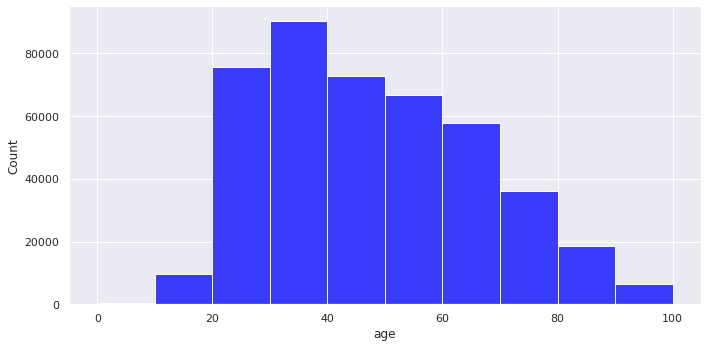

In [39]:
sns.set(font_scale=1)
sns.displot(voter_file,x='age',binwidth=10,height=5,aspect=2,color='blue')

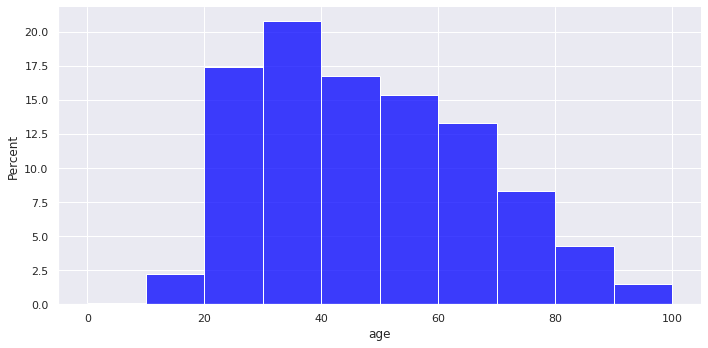

In [40]:
sns.displot(voter_file,x='age',binwidth=10,stat='percent',height=5,aspect=2,color='blue')

In [41]:
df=voter_file.groupby(['avgincome'],dropna=False)['uid'].count().reset_index(name='count')
df['percentage']=df['count']/df['count'].sum()*100
df

,avgincome,count,percentage
0,0,2033,0.467761
1,23056,998,0.229624
2,24518,1386,0.318896
3,27542,656,0.150935
4,28509,240,0.055220
...,...,...,...
518,508590,130,0.029911
519,544617,493,0.113431
520,577154,1,0.000230
521,582817,326,0.075007


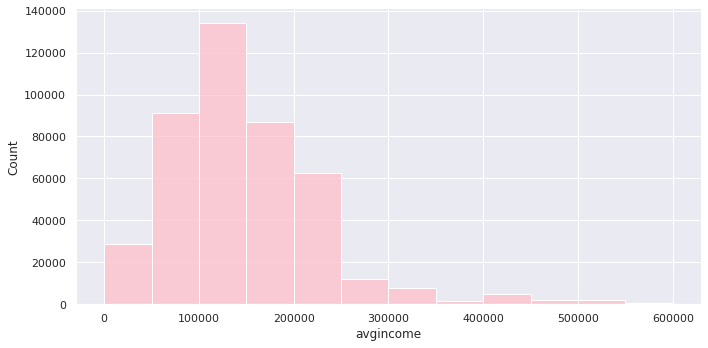

In [42]:
sns.displot(voter_file,x='avgincome',binwidth=50000,height=5,aspect=2,color='pink')

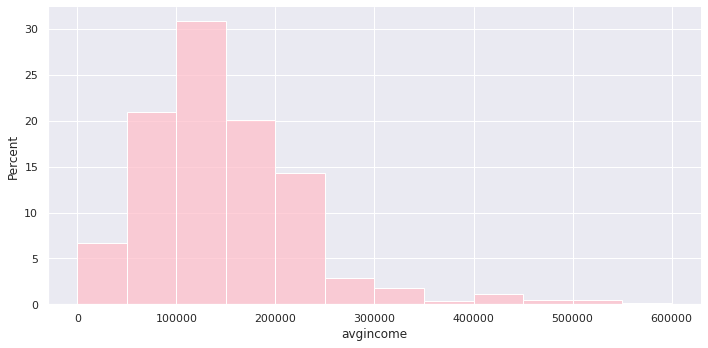

In [43]:
sns.displot(voter_file,x='avgincome',binwidth=50000,stat='percent',height=5,aspect=2,color='pink')

In [44]:
df=voter_file.groupby(['party'],dropna=False)['uid'].count().reset_index(name='count')
df['percentage']=df['count']/df['count'].sum()*100
df

,party,count,percentage
0,AI,9508,2.187638
1,D,232145,53.412835
2,DS,112394,25.860054
3,GR,2390,0.549901
4,LI,3135,0.721313
5,NL,162,0.037274
6,PF,1183,0.272189
7,R,69532,15.998196
8,YY,4175,0.960600


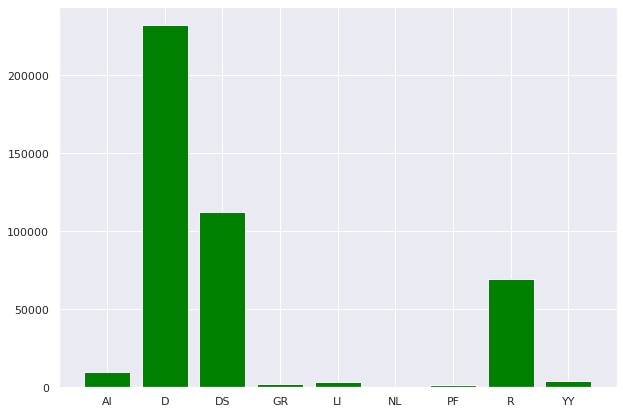

In [45]:
plt.figure(figsize=(10,7))
plt.bar(df['party'],df['count'],color='green',)
plt.show()

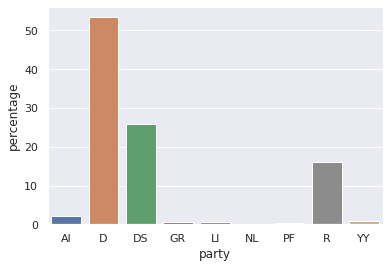

In [46]:
sns.barplot(x='party', y='percentage', data=df)

In [47]:
df_ideology=pd.DataFrame()
df_ideology['uid']=model_probabilities['uid']
df_ideology['ideology_label']=model_probabilities[['ideology__conservative','ideology__liberal','ideology__progressive','ideology__moderate']].idxmax(axis=1)
df_ideology

,uid,ideology_label
0,19525609133,ideology__liberal
1,19525609510,ideology__progressive
2,19525610606,ideology__progressive
3,19525612234,ideology__liberal
4,19525620658,ideology__liberal
...,...,...
434619,19524367951,ideology__liberal
434620,19524369333,ideology__liberal
434621,19524372045,ideology__conservative
434622,19524372425,ideology__progressive


In [48]:
df=df_ideology.groupby(['ideology_label'],dropna=False)['uid'].count().reset_index(name='count')
df['percentage']=df['count']/df['count'].sum()*100
df

,ideology_label,count,percentage
0,ideology__conservative,33888,7.797084
1,ideology__liberal,167924,38.636615
2,ideology__moderate,86899,19.994064
3,ideology__progressive,145913,33.572237


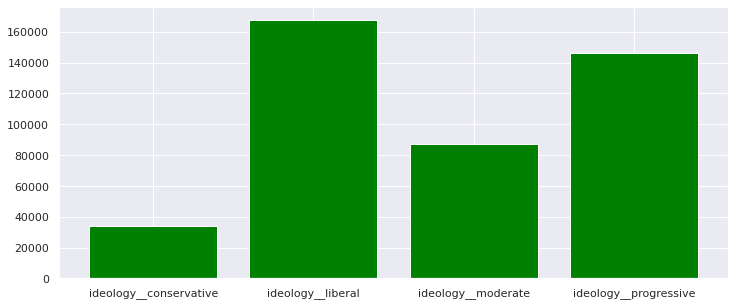

In [49]:
plt.figure(figsize=(12,5))
plt.bar(df['ideology_label'],df['count'],color='green')
plt.show()

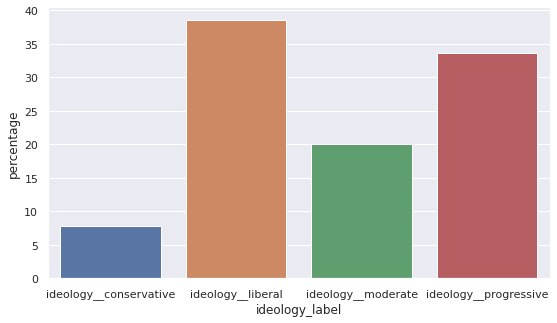

In [50]:
plt.figure(figsize=(9,5))
sns.barplot(x='ideology_label', y='percentage', data=df)

**SLIDE 2**

In [69]:
q="""
      select a.uid,
      case when a.school_decision==1 then 'PS' else 'PO' end as school_decision
      from (
        select uid, 
        case when max(public_schools__poor,public_schools__fair,public_schools__good)== public_schools__poor then 1 else 0 end as school_decision
        from model_probabilities
        where uid not in(select uid from known_supporters) and uid not in (select uid from known_opponents) 
        )a;
    
    """

In [70]:
potential=pysqldf(q)

In [71]:
q="""
    select *,'KS' as school_decision
    from known_supporters;
    """
known_supporters=pysqldf(q)

In [72]:
q="""
    select *,'KO' as school_decision
    from known_opponents;
    """
known_opponents=pysqldf(q)

In [73]:
q="""
    select uid, school_decision
    from known_supporters
    union
    select uid, school_decision
    from known_opponents
    union
    select uid, school_decision
    from potential;
    """
inferred_school_support=pysqldf(q)

In [74]:
inferred_school_support.head(15)

,uid,school_decision
0,191006,PO
1,191862,PO
2,199482,PO
3,1913237,PO
4,1941454,PO
5,1943680,PO
6,1959835,PO
7,1967072,KS
8,1975493,PO
9,1976827,KS


In [75]:
df=inferred_school_support.groupby(['school_decision'],dropna=False)['uid'].count().reset_index(name='count')
df['percentage']=df['count']/df['count'].sum()*100
df

,school_decision,count,percentage
0,KO,10556,2.428766
1,KS,77821,17.905362
2,PO,333140,76.650162
3,PS,13107,3.015710


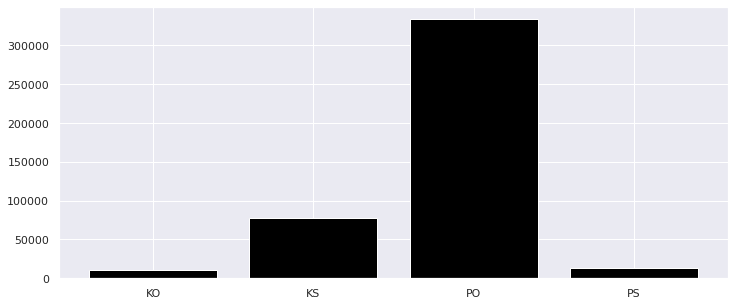

In [76]:
plt.figure(figsize=(12,5))
plt.bar(df['school_decision'],df['count'],color='black')
plt.show()

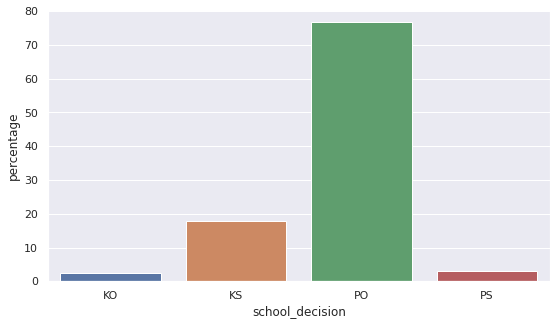

In [77]:
plt.figure(figsize=(9,5))
sns.barplot(x='school_decision', y='percentage', data=df)

*Two Target Population for a mailer*

In [87]:
#opponent uid and fam_uids
q="""
    select distinct uid   
    from uid_to_households_key
    where household_key in (select distinct household_key   
                        from uid_to_households_key
                        where uid in (select uid
                                      from known_opponents));
    """
large_opponents_uid_list=pysqldf(q)
large_opponents_uid_list

,uid
0,19527792779
1,19343592960
2,19426258221
3,19525026290
4,19213354830
...,...
15879,1918693762
15880,19102429843
15881,19213794331
15882,19442142703


In [91]:
#small target list =KS+PS
q="""
    select distinct b.household_key    
    from inferred_school_support a
    left join uid_to_households_key b on a.uid=b.uid 
    where a.school_decision in ('KS','PS') and a.uid not in (select uid from large_opponents_uid_list);
    """
small_target_list=pysqldf(q)
small_target_list


,household_key
0,19-192703271
1,19-192477207
2,19-192198865
3,19-192106054
4,19-192157124
...,...
65099,19-190978532
65100,19-192421290
65101,19-191612735
65102,19-192764172


In [96]:
#small target uid_list
q="""
    select distinct uid    
    from inferred_school_support 
    where school_decision in ('KS','PS') and uid not in (select uid from large_opponents_uid_list);
    """
small_target_uid=pysqldf(q)
small_target_uid

,uid
0,1967072
1,1976827
2,1979524
3,1979952
4,1998528
...,...
90514,19527932209
90515,19527932429
90516,19527932533
90517,19527932614


In [97]:
#small target age,gender,party distribution
q="""
    select age,count(distinct uid) as count    
    from voter_file 
    where uid in (select uid from small_target_uid )
    group by age
    order by age;
    """
age_dist=pysqldf(q)
age_dist

,age,count
0,NaN,21
1,0.0,29
2,1.0,19
3,2.0,10
4,3.0,7
...,...,...
88,95.0,183
89,96.0,114
90,97.0,81
91,98.0,61


In [98]:
q="""
    select sex,count(distinct uid) as count    
    from voter_file 
    where uid in (select uid from small_target_uid )
    group by sex
    order by sex;
    """
sex_dist=pysqldf(q)
sex_dist

,sex,count
0,None,2760
1,F,38565
2,M,49194


In [99]:
q="""
    select party,count(distinct uid) as count    
    from voter_file 
    where uid in (select uid from small_target_uid )
    group by party
    order by party;
    """
party_dist=pysqldf(q)
party_dist

,party,count
0,AI,1892
1,D,17337
2,DS,20608
3,GR,283
4,LI,426
5,NL,26
6,PF,178
7,R,48940
8,YY,829


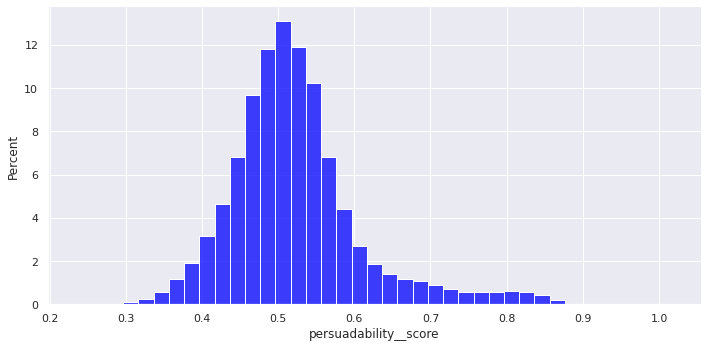

In [88]:
sns.displot(model_probabilities,x='persuadability__score',binwidth=0.02,stat='percent',height=5,aspect=2,color='blue')

In [100]:
#large target list
q="""
    select distinct b.household_key    
    from(
      select uid,
      case when (min(public_schools__good,public_schools__fair,public_schools__poor)==public_schools__good and persuadability__score>=0.56) or(max(public_schools__good,public_schools__fair)==public_schools__fair and  persuadability__score>=0.54 and abs(public_schools__good-public_schools__poor)<=0.03) then 1 else 0 end as targetable
      from model_probabilities
      where uid not in (select uid from small_target_uid)
    ) a
    left join uid_to_households_key b on a.uid=b.uid
    where a.targetable=1 and a.uid not in (select uid from large_opponents_uid_list)
    union
    select household_key
    from small_target_list;
    """
large_target_list=pysqldf(q)
large_target_list


,household_key
0,19-190147777
1,19-190147778
2,19-190147779
3,19-190147780
4,19-190147781
...,...
76725,19-192811843
76726,19-192811845
76727,19-192811846
76728,19-192811850


In [102]:
q="""
    select distinct a.uid    
    from(
      select uid,
      case when (min(public_schools__good,public_schools__fair,public_schools__poor)==public_schools__good and persuadability__score>=0.56) or(max(public_schools__good,public_schools__fair)==public_schools__fair and  persuadability__score>=0.54 and abs(public_schools__good-public_schools__poor)<=0.03) then 1 else 0 end as targetable
      from model_probabilities
      where uid not in (select uid from small_target_uid)
    ) a
    where a.targetable=1 and a.uid not in (select uid from large_opponents_uid_list)
    union
    select uid 
    from small_target_uid;
    """
large_target_uid=pysqldf(q)
large_target_uid

,uid
0,191006
1,1967072
2,1976827
3,1979524
4,1979952
...,...
108309,19527932429
108310,19527932533
108311,19527932614
108312,19527932791


In [103]:
#large target age,gender,party distribution
q="""
    select age,count(distinct uid) as count    
    from voter_file 
    where uid in (select uid from large_target_uid )
    group by age
    order by age;
    """
age_dist=pysqldf(q)
age_dist

,age,count
0,NaN,24
1,0.0,34
2,1.0,25
3,2.0,13
4,3.0,8
...,...,...
90,95.0,195
91,96.0,121
92,97.0,83
93,98.0,63


In [104]:
q="""
    select sex,count(distinct uid) as count    
    from voter_file 
    where uid in (select uid from large_target_uid )
    group by sex
    order by sex;
    """
sex_dist=pysqldf(q)
sex_dist

,sex,count
0,None,3300
1,F,46899
2,M,58115


In [106]:
q="""
    select party,count(distinct uid) as count    
    from voter_file 
    where uid in (select uid from large_target_uid )
    group by party
    order by party;
    """
party_dist=pysqldf(q)
party_dist

,party,count
0,AI,2524
1,D,21573
2,DS,28726
3,GR,377
4,LI,616
5,NL,28
6,PF,220
7,R,53155
8,YY,1095


**SLIDE 3**

*No contact list*

In [113]:
#opponent uid and fam_uids
q="""
    select distinct uid   
    from uid_to_households_key
    where household_key in (select distinct household_key   
                        from uid_to_households_key
                        where uid in (select uid
                                      from known_opponents));
    """
large_opponents_uid_list=pysqldf(q)
large_opponents_uid_list

,uid
0,19527792779
1,19343592960
2,19426258221
3,19525026290
4,19213354830
...,...
15879,1918693762
15880,19102429843
15881,19213794331
15882,19442142703


In [109]:
#opponent household_key and fam_uids
q="""
        select distinct household_key   
        from uid_to_households_key
        where uid in (select uid
                      from known_opponents);
    """
opponents_household_key_list=pysqldf(q)
opponents_household_key_list

,household_key
0,19-191823403
1,19-191898525
2,19-191898593
3,19-191898626
4,19-191915736
...,...
7030,19-192572906
7031,19-192572986
7032,19-192573061
7033,19-192572901


In [119]:
#opponent distribution based on party
q="""
    select party, count(distinct uid) as count
    from voter_file
    where uid in (select uid from large_opponents_uid_list)
    group by party
    order by count(distinct uid);
    """
opponent_party_dist=pysqldf(q)
opponent_party_dist

,party,count
0,NL,1
1,LI,3
2,PF,4
3,GR,16
4,YY,16
5,AI,28
6,R,233
7,DS,394
8,D,15189


In [120]:
#opponent distribution based on sex
q="""
    select sex, count(distinct uid) as count
    from voter_file
    where uid in (select uid from large_opponents_uid_list)
    group by sex
    order by count(distinct uid);
    """
opponent_sex_dist=pysqldf(q)
opponent_sex_dist

,sex,count
0,None,267
1,M,7353
2,F,8264


In [121]:
#opponent distribution based on ismarried
q="""
    select ismarried, count(distinct uid) as count
    from voter_file
    where uid in (select uid from large_opponents_uid_list)
    group by ismarried
    order by count(distinct uid);
    """
opponent_ismarried_dist=pysqldf(q)
opponent_ismarried_dist

,ismarried,count
0,Y,7434
1,N,8450


In [122]:
#opponent distribution based on neighborhood
q="""
    select neighborhood, count(distinct uid) as count
    from voter_file
    where uid in (select uid from large_opponents_uid_list)
    group by neighborhood
    order by count(distinct uid);
    """
opponent_neighborhood_dist=pysqldf(q)
opponent_neighborhood_dist

,neighborhood,count
0,5,212
1,6,321
2,36,356
3,32,935
4,16,1304
5,8,1550
6,4,2544
7,29,2742
8,14,2790
9,31,3130


In [124]:
#opponent distribution based on avgincome
q="""
    select avgincome, count(distinct uid) as count
    from voter_file
    where uid in (select uid from large_opponents_uid_list)
    group by avgincome
    order by avgincome;
    """
opponent_avgincome_dist=pysqldf(q)
opponent_avgincome_dist

,avgincome,count
0,0,24
1,23056,4
2,31846,2
3,32819,2
4,34717,2
...,...,...
443,506594,126
444,508590,10
445,544617,31
446,582817,64


In [125]:
#opponent distribution based on ideology
q="""
    select ideology_label, count(distinct uid) as count
    from df_ideology
    where uid in (select uid from large_opponents_uid_list)
    group by ideology_label
    order by count(distinct uid);
    """
opponent_ideology_dist=pysqldf(q)
opponent_ideology_dist

,ideology_label,count
0,ideology__conservative,91
1,ideology__moderate,1954
2,ideology__progressive,4181
3,ideology__liberal,9658


**PART 2**

In [12]:
#upload data tables
msg_test=pd.read_csv('Msg_test.csv',sep='\t')
msg_test

,api_id,party,CITY_TRACK,RCV_NAME_ID,MESSAGES_A,MESSAGES_B,RCV_PREFERENCE,Gender,Age,EDUCATION,RACE,HISPANIC_SUBETHNICITY,ac_poll_weight,strata,_merge
0,3.600000e+09,NON-DEM,2,1,NaN,4.0,2,1,61,7,1,NaN,0.696559,non-dem,Matched (3)
1,3.600000e+09,NON-DEM,2,1,1.0,4.0,2,1,71,7,1,NaN,0.886892,non-dem,Matched (3)
2,3.601000e+09,NON-DEM,2,2,NaN,4.0,2,1,72,6,1,NaN,0.761950,non-dem,Matched (3)
3,3.602000e+09,DEM,2,3,NaN,NaN,2,1,67,6,1,NaN,0.784956,dem,Matched (3)
4,3.602000e+09,DEM,2,3,1.0,1.0,4,2,58,7,1,NaN,0.640071,dem,Matched (3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,3.632000e+09,NON-DEM,2,3,3.0,NaN,2,2,48,6,1,NaN,1.777357,non-dem,Matched (3)
1240,3.632000e+09,NON-DEM,2,1,2.0,4.0,2,1,27,2,1,NaN,1.934684,non-dem,Matched (3)
1241,3.632000e+09,NON-DEM,2,3,NaN,3.0,2,1,32,6,1,NaN,1.052698,non-dem,Matched (3)
1242,3.632000e+09,DEM,2,3,NaN,NaN,1,2,46,7,5,NaN,0.801713,dem,Matched (3)


In [3]:
q="""
    select *
    from msg_test
    where MESSAGES_A !='NaN' and MESSAGES_B !='NaN';
    """
msg_test_both=pysqldf(q)
msg_test_both

,api_id,party,CITY_TRACK,RCV_NAME_ID,MESSAGES_A,MESSAGES_B,RCV_PREFERENCE,Gender,Age,EDUCATION,RACE,HISPANIC_SUBETHNICITY,ac_poll_weight,strata,_merge
0,3.600000e+09,NON-DEM,2,1,1.0,4.0,2,1,71,7,1,NaN,0.886892,non-dem,Matched (3)
1,3.602000e+09,DEM,2,3,1.0,1.0,4,2,58,7,1,NaN,0.640071,dem,Matched (3)
2,3.602000e+09,NON-DEM,2,2,3.0,3.0,2,1,52,6,1,NaN,0.839015,non-dem,Matched (3)
3,3.602000e+09,DEM,2,2,1.0,4.0,3,2,88,6,1,NaN,1.272469,dem,Matched (3)
4,3.602000e+09,DEM,2,3,2.0,1.0,2,2,81,7,1,NaN,1.186303,dem,Matched (3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,3.631000e+09,DEM,2,3,4.0,4.0,2,1,54,6,1,NaN,1.460093,dem,Matched (3)
256,3.631000e+09,NON-DEM,2,1,2.0,1.0,1,1,60,7,1,NaN,0.615356,non-dem,Matched (3)
257,3.632000e+09,NON-DEM,2,3,3.0,3.0,2,2,44,6,1,NaN,0.647821,non-dem,Matched (3)
258,3.632000e+09,NON-DEM,2,3,5.0,5.0,2,1,60,2,1,NaN,0.872838,non-dem,Matched (3)


In [25]:
q="""
    select avg(MESSAGES_A) as mean
    from msg_test
    where MESSAGES_A !='NaN' and MESSAGES_A !=5;
    """
msg_test_A_mean=pysqldf(q)
msg_test_A_mean

,mean
0,2.241758


In [27]:
q="""
    select avg(MESSAGES_B) as mean
    from msg_test
    where MESSAGES_B !='NaN' and MESSAGES_B !=5;
    """
msg_test_B_mean=pysqldf(q)
msg_test_B_mean

,mean
0,2.566855


In [29]:
q="""
    select avg(MESSAGES_A) as mean
    from msg_test_both
    where MESSAGES_A !=5;
    """
msg_test_A_mean_both=pysqldf(q)
msg_test_A_mean_both

,mean
0,2.271255


In [30]:
q="""
    select avg(MESSAGES_B) as mean
    from msg_test_both
    where MESSAGES_B !=5;
    """
msg_test_B_mean_both=pysqldf(q)
msg_test_B_mean_both

,mean
0,2.463115


In [92]:
q="""
    select *
    from msg_test
    where ((MESSAGES_A is null and MESSAGES_B is not null) or (MESSAGES_A is not null and MESSAGES_B is null)) and (MESSAGES_A!=5 or MESSAGES_B!=5) and RCV_PREFERENCE!=4 ;
    """
msg_test_between=pysqldf(q)
msg_test_between

,api_id,party,CITY_TRACK,RCV_NAME_ID,MESSAGES_A,MESSAGES_B,RCV_PREFERENCE,Gender,Age,EDUCATION,RACE,HISPANIC_SUBETHNICITY,ac_poll_weight,strata,_merge
0,3.600000e+09,NON-DEM,2,1,NaN,4.0,2,1,61,7,1,NaN,0.696559,non-dem,Matched (3)
1,3.601000e+09,NON-DEM,2,2,NaN,4.0,2,1,72,6,1,NaN,0.761950,non-dem,Matched (3)
2,3.602000e+09,NON-DEM,2,4,4.0,NaN,2,2,65,6,5,NaN,0.691249,non-dem,Matched (3)
3,3.602000e+09,NON-DEM,2,3,2.0,NaN,2,1,59,2,1,NaN,0.880733,non-dem,Matched (3)
4,3.602000e+09,DEM,2,3,2.0,NaN,2,2,43,7,1,NaN,0.771576,dem,Matched (3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3.632000e+09,DEM,1,2,2.0,NaN,2,2,62,2,1,NaN,0.773492,dem,Matched (3)
541,3.632000e+09,NON-DEM,2,3,NaN,2.0,2,2,70,5,1,NaN,0.870467,non-dem,Matched (3)
542,3.632000e+09,NON-DEM,2,3,3.0,NaN,2,2,48,6,1,NaN,1.777357,non-dem,Matched (3)
543,3.632000e+09,NON-DEM,2,3,NaN,3.0,2,1,32,6,1,NaN,1.052698,non-dem,Matched (3)


In [93]:
q="""
    select city_track,RCV_NAME_ID,MESSAGES_A,Gender,Age,EDUCATION,RACE,ac_poll_weight,
    case when RCV_PREFERENCE==1 then 1 else 0 end as response_var,
    case when party=='NON-DEM' then 1 else 0 end as party_factorized
    from msg_test_between
    where MESSAGES_A is not null
    """
msg_test_between_A=pysqldf(q)
msg_test_between_A

,CITY_TRACK,RCV_NAME_ID,MESSAGES_A,Gender,Age,EDUCATION,RACE,ac_poll_weight,response_var,party_factorized
0,2,4,4.0,2,65,6,5,0.691249,0,1
1,2,3,2.0,1,59,2,1,0.880733,0,1
2,2,3,2.0,2,43,7,1,0.771576,0,0
3,2,1,2.0,1,52,7,1,0.661168,1,0
4,2,2,3.0,1,67,7,1,1.052352,1,0
...,...,...,...,...,...,...,...,...,...,...
274,3,4,3.0,2,24,5,1,1.083290,1,0
275,1,3,1.0,1,50,7,3,1.765922,0,0
276,1,1,1.0,2,41,2,2,3.091173,0,0
277,1,2,2.0,2,62,2,1,0.773492,0,0


In [94]:
q="""
    select city_track,RCV_NAME_ID,MESSAGES_B,Gender,Age,EDUCATION,RACE,ac_poll_weight,
    case when RCV_PREFERENCE==1 then 1 else 0 end as response_var,
    case when party=='NON-DEM' then 1 else 0 end as party_factorized
    from msg_test_between
    where MESSAGES_B is not null
    """
msg_test_between_B=pysqldf(q)
msg_test_between_B

,CITY_TRACK,RCV_NAME_ID,MESSAGES_B,Gender,Age,EDUCATION,RACE,ac_poll_weight,response_var,party_factorized
0,2,1,4.0,1,61,7,1,0.696559,0,1
1,2,2,4.0,1,72,6,1,0.761950,0,1
2,1,2,3.0,2,70,7,1,1.272469,0,0
3,2,1,4.0,2,45,7,1,1.006291,0,1
4,2,1,4.0,1,60,7,2,0.690315,0,1
...,...,...,...,...,...,...,...,...,...,...
261,2,3,2.0,2,38,7,1,0.911787,0,1
262,1,2,2.0,2,32,6,1,1.256734,1,1
263,2,3,2.0,2,70,5,1,0.870467,0,1
264,2,3,3.0,1,32,6,1,1.052698,0,1


In [95]:
#Messages_A logistic regresison results
from sklearn.linear_model import LogisticRegression
y= msg_test_between_A['response_var'] #dependent variable
x= msg_test_between_A.drop(['response_var'], axis=1)
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression()
modelLogistic.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [96]:
print("The intercept b0= ", modelLogistic.intercept_)
print("The coefficient b1= ", modelLogistic.coef_)
#Using statsmodels package to obtian the model
import statsmodels.api as sm
x_train = sm.add_constant(x)
logit_model=sm.Logit(y,x_train)
result=logit_model.fit()
print(result.summary())

The intercept b0=  [4.74342918]
The coefficient b1=  [[-0.17086284 -0.72257351 -0.47918133 -0.15317744 -0.03336831  0.12305729
  -0.23981874 -0.87241829 -1.69938145]]
Optimization terminated successfully.
         Current function value: 0.428921
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           response_var   No. Observations:                  279
Model:                          Logit   Df Residuals:                      269
Method:                           MLE   Df Model:                            9
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.2918
Time:                        01:52:11   Log-Likelihood:                -119.67
converged:                       True   LL-Null:                       -168.97
Covariance Type:            nonrobust   LLR p-value:                 3.028e-17
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [97]:
#Messages_B logistic regresison results
from sklearn.linear_model import LogisticRegression
y= msg_test_between_B['response_var'] #dependent variable
x= msg_test_between_B.drop(['response_var'], axis=1)
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression()
modelLogistic.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [98]:
#Using statsmodels package to obtian the model
import statsmodels.api as sm
x_train = sm.add_constant(x)
logit_model=sm.Logit(y,x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.271211
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           response_var   No. Observations:                  266
Model:                          Logit   Df Residuals:                      256
Method:                           MLE   Df Model:                            9
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.5123
Time:                        01:52:25   Log-Likelihood:                -72.142
converged:                       True   LL-Null:                       -147.91
Covariance Type:            nonrobust   LLR p-value:                 4.236e-28
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.7696      1.716      1.614      0.106      -0.593       6.133
CITY_TRACK 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
